# Gradient descent with sklearn.linear_model

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])  # input with 2 features
y = np.dot(X,np.array([1,2])) + 3 # y = 1* x[0] + 2*x[1] + 3

# fitting the line
reg = LinearRegression().fit(X,y)

# printing line parameters
reg.coef_, reg.intercept_

(array([1., 2.]), 3.0000000000000018)

# Gradient descent for data having one feature

2.0053019383518196 9.966753740427402


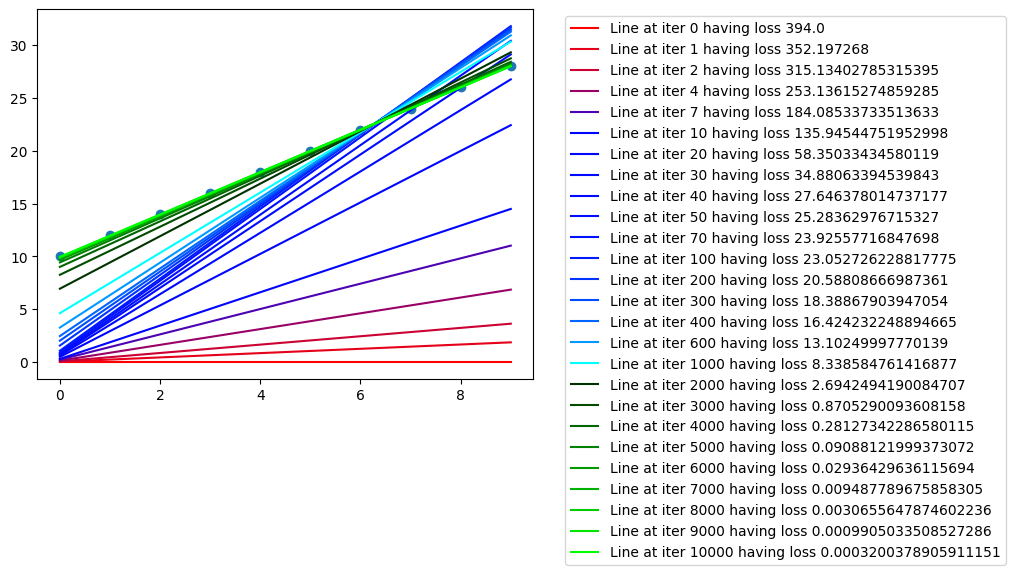

In [2]:
import matplotlib.pyplot as plt

def getLine(m,c,num_points):
    xLine = np.arange(num_points)
    yLine = m*x+c
    return xLine,yLine

def calculateLoss(x,y,m,c,num_points):
    loss = 0
    for i in range(num_points):
        loss += (y[i] - (m*x[i] +c))**2
    return loss/num_points

num_points = 10
alpha = 0.001

x = np.arange(num_points)
y = 2*x + 10
m,c = 0,0

# scatter plot of dataset
plt.scatter(x,y)

#get points for line having slope m and intersect c
xLine,yLine = getLine(m,c,num_points)
loss = calculateLoss(x,y,m,c,num_points)
label = f'Line at iter 0 having loss {loss}'  # Generate a label for the line
#plot of line at initial values of m, c
plt.plot(xLine,yLine,color=(1, 0, 0),label= label)

array = [1,2,4,7,10,20,30,40,50,70,100,200,300,400,600]
# gradient_descent
for iter in range(1,10001):
    m_grad = 0
    c_grad = 0
    for i in range(num_points):
        m_grad += 2*(m*x[i]+c-y[i])*x[i]
        c_grad += 2*(m*x[i]+c-y[i])
    c = c - alpha * c_grad/num_points
    m = m - alpha*m_grad/num_points
    if(iter%1000==0 or iter in array):
        # plt.plot(xLine,yLine,label=str(round(m,3))+','+str(round(c,3)),color=(max(0,1-iter/1000),min(1,iter/1000),0))
        loss = calculateLoss(x,y,m,c,num_points)
        label = f'Line at iter {iter} having loss {loss}'  # Generate a label for the line
        xLine,yLine = getLine(m,c,num_points)
        if(iter<2000):
            plt.plot(xLine,yLine, label=label, color=(max(0,1-1000*iter/10000),10*iter/10000,min(1,1000*iter/10000)))
        else:
            plt.plot(xLine,yLine, label=label, color=(0,iter/10000,0))
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
print(m,c)

# Gradient descent for data having >1 features

weights are [1.00182254 2.00364508], and bias is 29.851199447007964


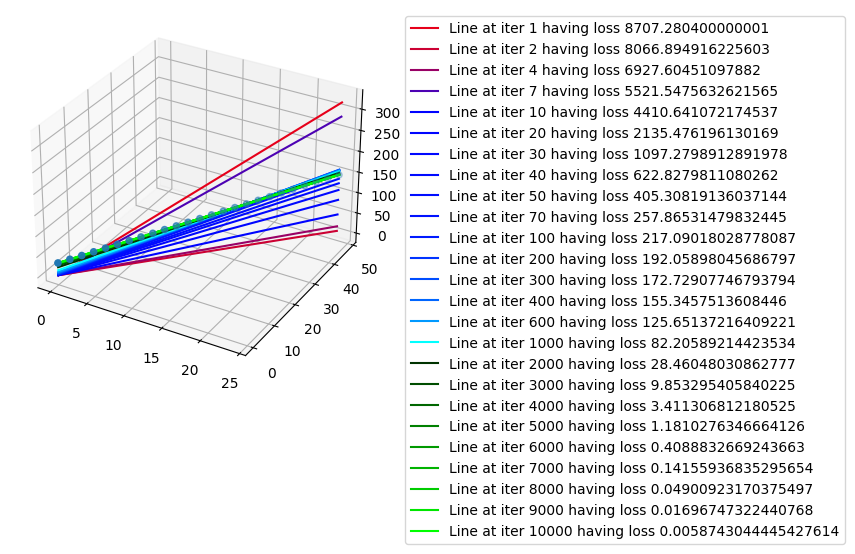

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

num_points = 10
def getLine(m,c,x):
    yLine = np.dot(x,m)+c
    return x,yLine

def calculateLoss(x,y,m,c,num_points):
    loss = 0
    for i in range(num_points):
        loss += (y[i] - (np.dot(m,x[i]) +c))**2
    return loss/num_points

def predictedValue(x,m,c):
    return m*x +c

num_points = 25
alpha = 0.001

x = np.array([[i,2*i] for i in range(num_points)]) # input with two features
y = np.dot(x,np.array([1,2])) + 30 # y = 1* x[0] + 2*x[1] + 30, if more than two coefficient make appropriate change in the line
m,c = [0]*x.shape[1],0 # two coefficient and one bias term, will detect the number of coefficient with shape 
# scatter plot of dataset only for two coefficient and one bias term
ax.scatter3D([i[0] for i in x],[i[1] for i in x], y ) # only valid for two features
# plt.scatter(x,y)

#get points for line having slope m and intersect c
xLine,yLine = getLine(m,c,num_points)
loss = calculateLoss(x,y,m,c,num_points)
label = f'Line at iter 0 having loss {loss}'  # Generate a label for the line

array = [1,2,4,7,10,20,30,40,50,70,100,200,300,400,600]
# gradient_descent
for iter in range(1,10001):
    m_grad = 0
    c_grad = 0
    for i in range(num_points):
        m_grad += 2*(np.dot(m,x[i])+c-y[i])*x[i]
        c_grad += 2*(np.dot(m,x[i])+c-y[i])
        # print(m_grad,c_grad)
    c = c - alpha * c_grad/num_points
    m = m - alpha*m_grad/num_points
    if(iter%1000==0 or iter in array):
        loss = calculateLoss(x,y,m,c,num_points)        
        label = f'Line at iter {iter} having loss {loss}'  # Generate a label for the line
        xLine,yLine = getLine(m,c,x)
        if(iter<2000):
            ax.plot3D([i[0] for i in xLine],[i[1] for i in xLine], yLine, label=label, color=(max(0,1-1000*iter/10000),10*iter/10000,min(1,1000*iter/10000)))
        else:
            ax.plot3D([i[0] for i in xLine],[i[1] for i in xLine], yLine, label=label, color=(0,iter/10000,0))
            
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
print(f'weights are {m}, and bias is {c}')